<span style = " font-size: 35px;"> **Sentiment Analysis**.</span>  
<span style = " font-size: 28px;"> **Introduction**.</span>  


This project focuses on conducting sentiment analysis within the r/gaming subreddit on Reddit, where a diverse array of over 13,000 comments has been annotated with sentiment labels, categorizing them as positive or negative. Leveraging Natural Language Processing (NLP) techniques and sentiment analysis algorithms, the aim is to delve into the emotional nuances prevalent in gaming-related conversations. Key objectives include categorizing comments based on sentiments, identifying prevailing emotional tones across various gaming topics, visualizing sentiment distributions to comprehend the emotional dynamics, and exploring potential correlations between sentiments and specific gaming themes.

<span style = " font-size: 30px;"> **Sentiment Analysis using Vader**</span> 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pault\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



 RAW SENTIMENTS
                                                                                       dont think like game havent even played minute still tutorial  0
0                                                                                     leave farm smaller creature either wait help kill click button  0
1                                                                                               nothing beat feeling get see fall love like year ago  1
2                                                                                       also theyre made paper edit tried make gif failed here video  0
3  haha exactly brother tried get wow run raid get level faster get better gear first need min level lvl ok let couple quest get quest collect apple  1
4                                                                                im going right started playing minecraft first time walk everything  1

 Data dimension =  (13791, 2)

 QUANTITATIVE RESULTS
  dont think like

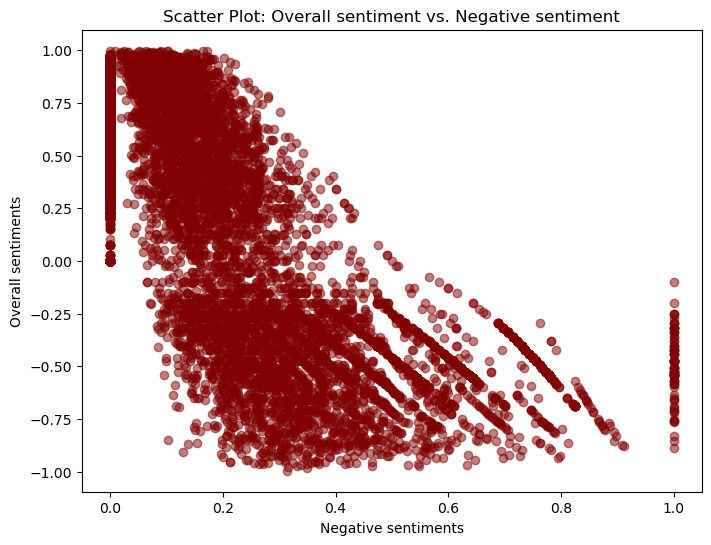

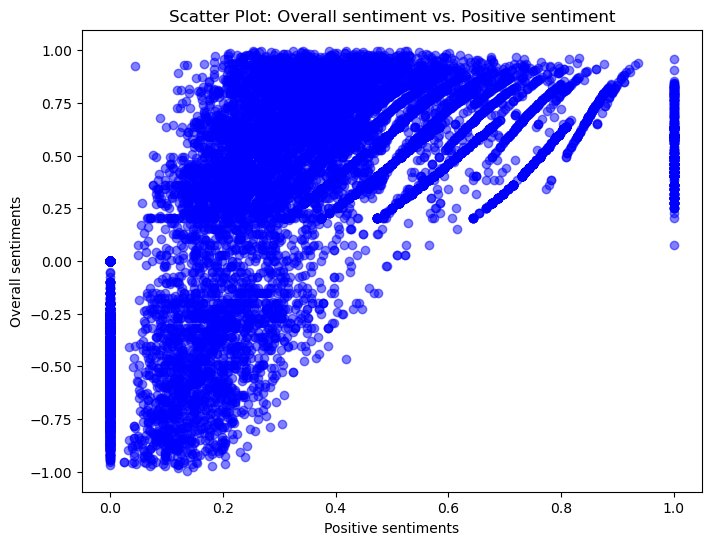


 SENTIMENT DISTRIBUTION


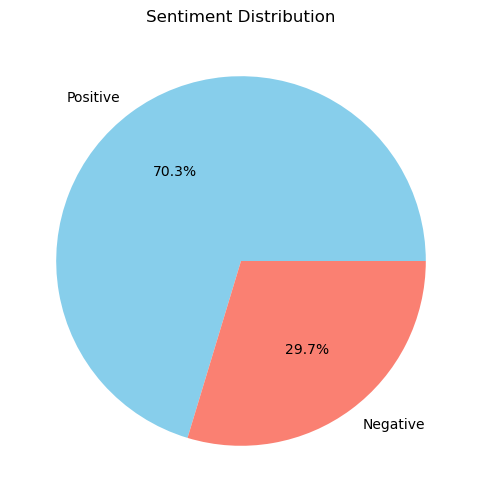


 Number of Predicted Positive Sentiments: 9699
 Number of Predicted Negative Sentiments: 4092

 ZERO-TRUST EVALUATION METRIC
1    9772
0    4019
Name: label, dtype: int64

Positive Sentiments: 9772

Negative Sentiments: 4019

Number of Predicted Positive Sentiments
9699

Number of Predicted Negative Sentiments
4092

Accuracy of the model is : 98.71829771540564


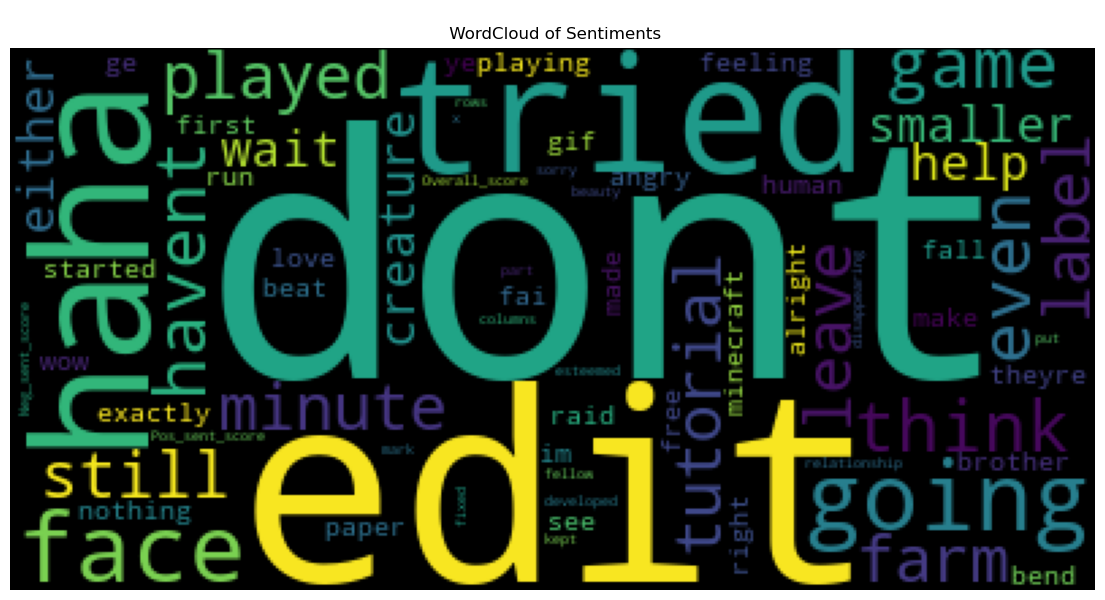

In [52]:

import nltk
nltk.download('vader_lexicon')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud


class SentimentAnalyzer:
    
    def load_data(self, file_path):
                               
        df = pd.read_csv(file_path, delimiter='\t')
        
        self.df = df
        
        print('\n RAW SENTIMENTS')
        
        print(df.head().to_string(index=True))
        print('\n Data dimension = ', df.shape)
                  
        
    def compute_sentiment(self): 
        
        df = self.df
        
        sa = SentimentIntensityAnalyzer()
        
        compound_score = []
        positive_score = []
        negative_score = []
        
        for x in range(0, df.shape[0]):
            score_list = sa.polarity_scores(df.iloc[x][0])
            
            comp = score_list['compound']
            compound_score.append(comp)
            
            posit = score_list['pos']
            positive_score.append(posit)
            
            negat = score_list['neg']
            negative_score.append(negat)            
         
        df['Overall_score'] = compound_score
        df['Pos_sent_score'] = positive_score
        df['Neg_sent_score'] = negative_score
          
                
    def quantitative_sentiment(self): 
        df = self.df
        
        print('\n QUANTITATIVE RESULTS')     
        print(df.head())
        
        print('\n DESCRIPTIVE STATISTICS')         
        print(df.describe())
        
        
    def visualize_sentiment(self):                 
        print('\n VISUALIZE SENTIMENTS')
        df = self.df
                
        x = df['Neg_sent_score']
        y = df['Overall_score']

        # Create a scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, marker='o', color='maroon', alpha=0.5)
        plt.xlabel('Negative sentiments')
        plt.ylabel('Overall sentiments')
        plt.title('Scatter Plot: Overall sentiment vs. Negative sentiment')
        plt.show()
        
        
        
        x = df['Pos_sent_score']
        y = df['Overall_score']

        # Create a scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, marker='o', color='blue', alpha=0.5)
        plt.xlabel('Positive sentiments')
        plt.ylabel('Overall sentiments')
        plt.title('Scatter Plot: Overall sentiment vs. Positive sentiment')
        plt.show()
        
    
    def evaluation(self):                 
        print('\n SENTIMENT DISTRIBUTION')
        df = self.df
        
        positive_sentiments = (df['Overall_score'] > 0).sum()
        negative_sentiments = (df['Overall_score'] <= 0).sum()
        
        sentiment_counts = [positive_sentiments, negative_sentiments]
        labels = ['Positive', 'Negative']
        
        plt.figure(figsize=(6, 6))
        plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
        plt.title('Sentiment Distribution')
        plt.show()
        
        print('\n Number of Predicted Positive Sentiments:', positive_sentiments)
        print(' Number of Predicted Negative Sentiments:', negative_sentiments)
        
        print('\n ZERO-TRUST EVALUATION METRIC')
        df = self.df
        df.rename(columns={'0': 'label'}, inplace =True)
        
        print(df['label'].value_counts())
        label_counts = df['label'].value_counts()
        
        print('\nPositive Sentiments:', label_counts.get(1,0))
        Actual_Positive = label_counts.get(1,0)
        
        print('\nNegative Sentiments:', label_counts.get(0,0))
        Actual_Negative = label_counts.get(0,0)
        
        print('\nNumber of Predicted Positive Sentiments')
        print((df['Overall_score'] > 0).sum())
        Predicted_Positive = (df['Overall_score'] > 0). sum()
                        
        print('\nNumber of Predicted Negative Sentiments')
        print((df['Overall_score'] <= 0).sum())
        Predicted_Negative = (df['Overall_score'] <= 0). sum()
        
        self.predicted_Positive = Predicted_Positive
        self.predicted_Negative = Predicted_Negative
        self.Actual_positive = Actual_Positive
        self.Actual_negative = Actual_Negative
        
              
    def Accuracy(self):
        percentage_error_Positive = ((self.predicted_Positive - self.Actual_positive)/ self.Actual_positive)* 100
        percentage_error_Negative = ((self.predicted_Negative - self.Actual_negative)/ self.Actual_negative)* 100
              
        positive_accuracy = (100 - abs(percentage_error_Positive))
        negative_accuracy = (100 - abs(percentage_error_Negative))
        Accuracy = (positive_accuracy + negative_accuracy)/2
        print('\nAccuracy of the model is :', Accuracy)
        
    def generate_wordcloud(self):
        df = self.df
        decision_keywords = WordCloud().generate(str(self.df))
        plt.figure(figsize = (14,14))
        plt.axis("off")
        plt.title('\n WordCloud of Sentiments')
        plt.imshow(decision_keywords)   

        
            
#----------------------------Class Driver --------------------------------------    
handle = SentimentAnalyzer()

file_path = 'gamingdataset.txt'
handle.load_data(file_path)


handle.compute_sentiment()

handle.quantitative_sentiment()

handle.visualize_sentiment()

handle.evaluation()

handle.Accuracy()

handle.generate_wordcloud()



__Analysing the Wordcloud__

Examining the word cloud generated from the text file indicates negative results which means that, 
the sentiments from the people are always negative that gives a bad reputation about the gaming 
manufactures being discussed here and attention should be drawn to it.

<span style = " font-size: 30px;"> **Sentiment Analysis using Textblob**</span> 


 RAW SENTIMENTS
                                                                                       dont think like game havent even played minute still tutorial  0
0                                                                                     leave farm smaller creature either wait help kill click button  0
1                                                                                               nothing beat feeling get see fall love like year ago  1
2                                                                                       also theyre made paper edit tried make gif failed here video  0
3  haha exactly brother tried get wow run raid get level faster get better gear first need min level lvl ok let couple quest get quest collect apple  1
4                                                                                im going right started playing minecraft first time walk everything  1

 Data dimesnion =  (13791, 2)

 QUANTITATIVE RESULTS
  dont think like

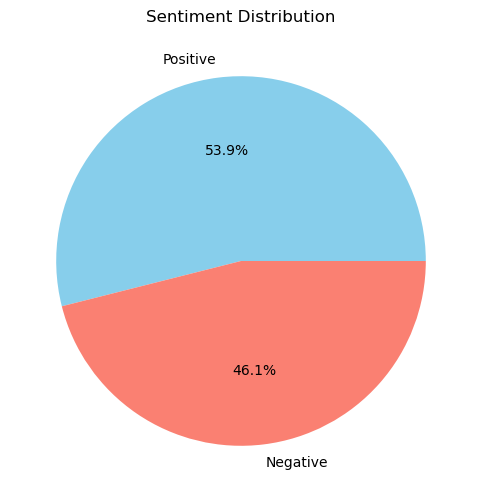


 Number of Predicted Positive Sentiments: 7439
 Number of Predicted Negative Sentiments: 6352

 ZERO-TRUST EVALUATION METRIC
1    9772
0    4019
Name: label, dtype: int64

Positive Sentiments: 9772

Negative Sentiments: 4019

Number of Predicted Positive Sentiments
7439

Number of Predicted Negative Sentiments
6352

Accuracy of the model is : 59.03819958960798


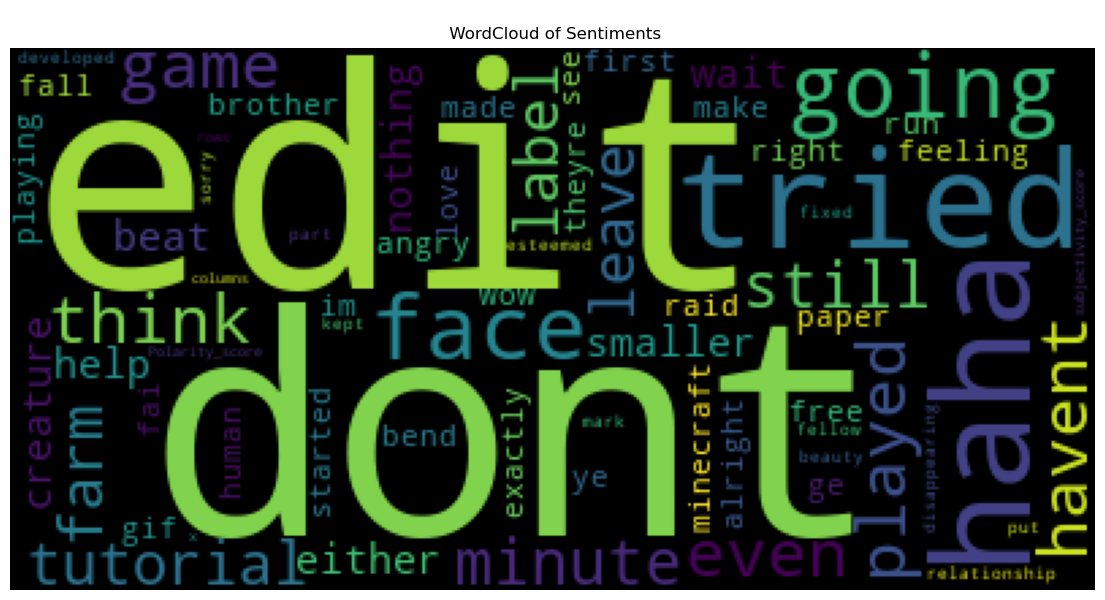

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

class SentimentTextblob:
    
    def load_data(self, file_path):
                               
        df = pd.read_csv(file_path, delimiter='\t')
        
        self.df = df
        
        print('\n RAW SENTIMENTS')
        
        print(df.head().to_string(index=True))
        print('\n Data dimesnion = ', df.shape)
        
        
    def compute_sentiment(self): 
        
        df = self.df            
        
        polarity_score = []
        subjectivity_score = []
                
        for x in range(0, df.shape[0]):
            score_list = TextBlob(df.iloc[x][0])
            
            pola_score = score_list.sentiment[0]
            polarity_score.append(pola_score)
            
            subject_score = score_list.sentiment[1]
            subjectivity_score.append(subject_score)
            
         
        df['Polarity_score'] = polarity_score
        df['subjectivity_score'] = subjectivity_score
        
        
    def quantitative_sentiment(self): 
        df = self.df
        
        print('\n QUANTITATIVE RESULTS')     
        print(df.head())
        
        print('\n DESCRIPTIVE STATISTICS')         
        print(df.describe())
        

    
    def evaluation(self):
        print('\n SENTIMENT DISTRIBUTION')
        df = self.df
        
        positive_sentiments = (df['Polarity_score'] > 0).sum()
        negative_sentiments = (df['Polarity_score'] <= 0).sum()
        
        sentiment_counts = [positive_sentiments, negative_sentiments]
        labels = ['Positive', 'Negative']
        
        plt.figure(figsize=(6, 6))
        plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
        plt.title('Sentiment Distribution')
        plt.show()
        
        print('\n Number of Predicted Positive Sentiments:', positive_sentiments)
        print(' Number of Predicted Negative Sentiments:', negative_sentiments)
        
        print('\n ZERO-TRUST EVALUATION METRIC')
        df = self.df
        df.rename(columns={'0': 'label'}, inplace =True)
        
        print(df['label'].value_counts())
        label_counts = df['label'].value_counts()
        
        print('\nPositive Sentiments:', label_counts.get(1,0))
        Actual_Positive = label_counts.get(1,0)
        
        print('\nNegative Sentiments:', label_counts.get(0,0))
        Actual_Negative = label_counts.get(0,0)
        
        print('\nNumber of Predicted Positive Sentiments')
        print((df['Polarity_score'] > 0).sum())
        Predicted_Positive = (df['Polarity_score'] > 0). sum()
                        
        print('\nNumber of Predicted Negative Sentiments')
        print((df['Polarity_score'] <= 0).sum())
        Predicted_Negative = (df['Polarity_score'] <= 0). sum()
        
        self.predicted_Positive = Predicted_Positive
        self.predicted_Negative = Predicted_Negative
        self.Actual_positive = Actual_Positive
        self.Actual_negative = Actual_Negative 
        
        

    def Accuracy(self):
        percentage_error_Positive = ((self.predicted_Positive - self.Actual_positive)/ self.Actual_positive)* 100
        percentage_error_Negative = ((self.predicted_Negative - self.Actual_negative)/ self.Actual_negative)* 100
              
        positive_accuracy = (100 - abs(percentage_error_Positive))
        negative_accuracy = (100 - abs(percentage_error_Negative))
        Accuracy = (positive_accuracy + negative_accuracy)/2
        print('\nAccuracy of the model is :', Accuracy)
        
    def generate_wordcloud(self):
        df = self.df
        decision_keywords = WordCloud().generate(str(self.df))
        plt.figure(figsize = (14,14))
        plt.axis("off")
        plt.title('\n WordCloud of Sentiments')
        plt.imshow(decision_keywords)   
 
        
    

    
                
#----------------------------Class Driver --------------------------------------    
handle = SentimentTextblob()

file_path = 'gamingdataset.txt'
handle.load_data(file_path)

handle.compute_sentiment()

handle.quantitative_sentiment()

handle.evaluation()

handle.Accuracy()

handle.generate_wordcloud()


__Analysing the Wordcloud__

Examining the word cloud generated from the text file indicates negative results which means that, 
the sentiments from the people are always negative that gives a bad reputation about the gaming 
manufactures being discussed here and attention should be drawn to it.

__Comparison of results__


Sentiment analysis using Vader shows better accuracy than using TextBlob. The accuracy in Vader is 98.71 while that in TextBlob is 59.04. 
The accuracy disparity between sentiment analysis using VADER and TextBlob primarily stems from distinctive factors. VADER's strength lies in its specialized lexicon tailored for social media text, enabling it to interpret slang, emoticons, and context-specific language nuances more effectively than TextBlob.


Moreover, VADER's rule-based approach considers word intensity and context, allowing it to handle modifiers, negations, and nuanced sentiment expressions better than TextBlob's simpler algorithm. Its training on a diverse dataset and frequent updates also contribute to its adaptability to contemporary language usage. Conversely, TextBlob might be better suited for more formal language due to its generalized lexicon and less complex sentiment analysis mechanism. Overall, the choice between VADER and TextBlob should depend on the specific context and requirements of the analyzed data, considering their respective strengths and weaknesses
